In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans # 클러스터링
from sklearn.datasets import make_blobs # 샘플 생성
import pandas as pd

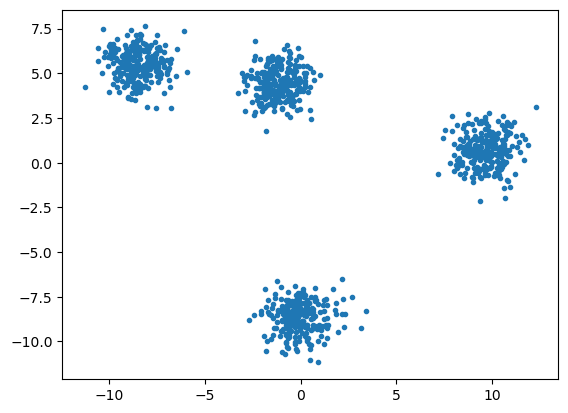

<class 'numpy.ndarray'>


In [8]:
# 랜덤 시드 고정
np.random.seed(7)
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], marker='.')
plt.show()
print(type(X))

In [12]:
X = pd.read_csv("power_consumption_data.csv")
power_consumption = np.array(X['power_consumption']).reshape(-1, 1)
k_means = KMeans(init='k-means++', 
                n_clusters=3, # 클러스터 셋팅개수 
                n_init=12)   # 실행횟수 12회
print()
k_means.fit(power_consumption)

KMeans(n_clusters=3, n_init=12)

In [13]:
k_means_labels = k_means.labels_
print('k_means_labels : ', k_means_labels)

k_means_labels :  [0 0 0 ... 0 0 0]


In [14]:
k_means_cluster_centers = k_means.cluster_centers_
print('k_means_cluster_certers : ', k_means_cluster_centers)

k_means_cluster_certers :  [[  2.52474744]
 [112.68072185]
 [ 97.49600315]]


InvalidIndexError: (array([ True,  True,  True, ...,  True,  True,  True]), 0)

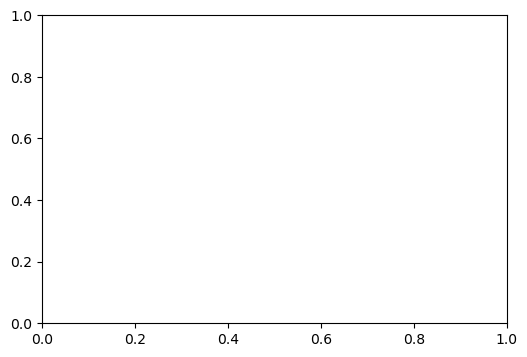

In [16]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(6, 4))

# 레이블 수에 따라 색상배열 생성, 고유한 색상을 얻기위해 ser(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))

# plot 생성
ax = fig.add_subplot(1,1,1)

for k, col in zip(range(3), colors) :
    my_members = (k_means_labels == k)
    
    # 중심 정의
    cluster_center = k_means_cluster_centers[k]
    
    # 중심 그리기
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markersize=6)
    
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()